In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
matches=pd.read_csv('matches.csv')
deliv=pd.read_csv('deliveries.csv')

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.shape, deliv.shape

((756, 18), (179078, 21))

In [5]:
deliv.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
total_runs=deliv.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [7]:
total_runs

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [8]:
total_runs=total_runs[total_runs['inning']==1]

# Just taking inning 1 to predict inning 2 runs

In [9]:
total_runs['total_runs']=total_runs['total_runs'].apply(lambda x:x+1)

# Runs required to win are runs_inning_1+1

In [10]:
total_runs

,match_id,inning,total_runs
0,1,1,208
2,2,1,185
4,3,1,184
6,4,1,164
8,5,1,158
...,...,...,...
1518,11347,1,144
1520,11412,1,137
1522,11413,1,172
1524,11414,1,156


# Merging total_runs in matches

In [11]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [12]:
matches_df=matches.merge(total_runs[['match_id','total_runs']],left_on='id',right_on='match_id')
matches_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,185
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,144
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,137
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,172
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,156


In [13]:
matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [14]:
matches_df=matches_df.replace('Rising Pune Supergiant','Rising Pune Supergiants')
matches_df=matches_df.replace('Pune Warriors','Rising Pune Supergiants')
matches_df=matches_df.replace('Delhi Daredevils','Delhi Capitals')
matches_df=matches_df.replace('Deccan Chargers','Sunrisers Hyderabad')

In [15]:
matches_df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala'],
      dtype=object)

In [16]:
teams_matches=matches_df.groupby(['team1']).size().reset_index()

In [17]:
teams_matches.sort_values(by=0)

,team1,0
4,Kochi Tuskers Kerala,7
2,Gujarat Lions,14
8,Rising Pune Supergiants,35
7,Rajasthan Royals,67
1,Delhi Capitals,78
5,Kolkata Knight Riders,83
9,Royal Challengers Bangalore,85
0,Chennai Super Kings,89
3,Kings XI Punjab,91
6,Mumbai Indians,101


# only considering the teams which are still playing ipl

In [18]:
teams_matches=teams_matches[teams_matches[0]>35]

In [19]:
l=teams_matches['team1'].tolist()
l

['Chennai Super Kings',
 'Delhi Capitals',
 'Kings XI Punjab',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [20]:
matches_df=matches_df[matches_df['team1'].isin(l)]

In [21]:
matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians',
       'Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Delhi Capitals', 'Kings XI Punjab', 'Chennai Super Kings',
       'Rajasthan Royals'], dtype=object)

In [22]:
matches_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,185
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,179
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,144
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,137
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,172
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,156


# Now handling matches with dl applied

In [24]:
# matches_df[matches_df['dl_applied']==1].style.background_gradient(cmap='plasma')

# As we are goint to predict if a team will win or not (rain and other accidental things which may lead to dl should be ignored)

In [25]:
matches_df=matches_df[matches_df['dl_applied']==0]


In [26]:
matches_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,185
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,179
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,144
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,137
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,172
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,156


# Can get the team1 and team2 from matchid, and other than the teams only city, winner and total_runs can have an impact on any teams performance not some umpire/toss decision as well

merging deliveries and matches on the mentioned fields

In [27]:
deliv.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [28]:
deliv_df=deliv.merge(matches_df[['match_id','city','winner','total_runs']],on='match_id')

In [29]:
deliv_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs_x,player_dismissed,dismissal_kind,fielder,city,winner,total_runs_y
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,4,0,4,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,2,2,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208


total_runs was already there in deliv dataframe 
now on introducing a new column with same name... 
previousone named total_runs_x and new one as total_runs_y

In [30]:
deliv_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs_x', 'player_dismissed',
       'dismissal_kind', 'fielder', 'city', 'winner', 'total_runs_y'],
      dtype='object')

# to calculate the runs required by the 2nd innings team ... we need to find cumulative sum of the runs which can be then subtracted by the total_runs in first innings (total_runs_y)...........
for that we will make a new column.... current score

In [31]:
deliv_df['curr_score']=deliv_df.groupby(['match_id','inning']).cumsum()['total_runs_x']

In [32]:
deliv_df.loc[124]

match_id                                      1
inning                                        1
batting_team                Sunrisers Hyderabad
bowling_team        Royal Challengers Bangalore
over                                         20
ball                                          6
batsman                             BCJ Cutting
non_striker                            DJ Hooda
bowler                                SR Watson
is_super_over                                 0
wide_runs                                     0
bye_runs                                      0
legbye_runs                                   0
noball_runs                                   0
penalty_runs                                  0
batsman_runs                                  6
extra_runs                                    0
total_runs_x                                  6
player_dismissed                            NaN
dismissal_kind                              NaN
fielder                                 

# to see the runs left to score ...........  

In [33]:
deliv_df['runs_left']=deliv_df['total_runs_y']-deliv_df['curr_score']

In [34]:
deliv_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,extra_runs,total_runs_x,player_dismissed,dismissal_kind,fielder,city,winner,total_runs_y,curr_score,runs_left
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,0,208
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,0,208
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,4,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,4,204
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,4,204
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,2,2,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,6,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162737,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,1,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153,152,1
162738,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,2,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153,154,-1
162739,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,1,SR Watson,run out,KH Pandya,Hyderabad,Mumbai Indians,153,155,-2
162740,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,2,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153,157,-4


# Along with the runs left the number of balls left also matters

In [35]:
deliv_df['balls_left']=126-(deliv['over']*6+deliv_df['ball']) 

In [36]:
deliv_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,total_runs_x,player_dismissed,dismissal_kind,fielder,city,winner,total_runs_y,curr_score,runs_left,balls_left
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,0,208,119.0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,0,208,118.0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,4,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,4,204,117.0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,4,204,116.0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,2,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,6,202,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162737,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,1,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153,152,1,46.0
162738,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,2,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153,154,-1,45.0
162739,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,1,SR Watson,run out,KH Pandya,Hyderabad,Mumbai Indians,153,155,-2,44.0
162740,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,2,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153,157,-4,37.0


# dismissal and wicket lost........... 

In [37]:
deliv_df['player_dismissed'].fillna('0',inplace=True)

In [38]:
deliv_df['player_dismissed']=deliv_df['player_dismissed'].apply(lambda x:x if x=='0' else '1')

In [39]:
deliv_df['player_dismissed']=deliv_df['player_dismissed'].astype(np.int32)

In [40]:
deliv_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,total_runs_x,player_dismissed,dismissal_kind,fielder,city,winner,total_runs_y,curr_score,runs_left,balls_left
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,0,208,119.0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,0,208,118.0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,4,0,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,4,204,117.0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,4,204,116.0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,2,0,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,6,202,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162737,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,1,0,NaN,NaN,Hyderabad,Mumbai Indians,153,152,1,46.0
162738,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,2,0,NaN,NaN,Hyderabad,Mumbai Indians,153,154,-1,45.0
162739,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,1,1,run out,KH Pandya,Hyderabad,Mumbai Indians,153,155,-2,44.0
162740,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,2,0,NaN,NaN,Hyderabad,Mumbai Indians,153,157,-4,37.0


In [41]:
# wickets left.... 
wickets= deliv_df.groupby(['match_id','inning']).cumsum()['player_dismissed'].values
deliv_df['wickets']=10-wickets
deliv_df.head(20)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,player_dismissed,dismissal_kind,fielder,city,winner,total_runs_y,curr_score,runs_left,balls_left,wickets
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,0,208,119.0,10
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,0,208,118.0,10
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,4,204,117.0,10
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,4,204,116.0,10
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,6,202,115.0,10
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,6,202,114.0,10
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,7,201,113.0,10
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,8,200,113.0,10
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,12,196,112.0,10
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,13,195,111.0,10


In [42]:
deliv_df['runs_left']=deliv_df['runs_left'].apply(lambda x:x if x>=0 else 0)

In [43]:
deliv_df['curr_rr']=(deliv_df['curr_score']*6)/(120-deliv_df['balls_left'])

In [44]:
deliv_df['req_rr']=(deliv_df['runs_left']*6)/(deliv_df['balls_left'])

## Checking if batting team is the winner

In [45]:
deliv_df['result']=deliv_df.index

In [46]:
deliv_df['result']=deliv_df['result'].apply(lambda x:1 if deliv_df.loc[x,'batting_team']==deliv_df.loc[x,'winner'] else 0)

In [47]:
deliv_df.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,city,winner,total_runs_y,curr_score,runs_left,balls_left,wickets,curr_rr,req_rr,result
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,Hyderabad,Sunrisers Hyderabad,208,0,208,119.0,10,0.0,10.487395,1
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,Hyderabad,Sunrisers Hyderabad,208,0,208,118.0,10,0.0,10.576271,1
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,Hyderabad,Sunrisers Hyderabad,208,4,204,117.0,10,8.0,10.461538,1
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,Hyderabad,Sunrisers Hyderabad,208,4,204,116.0,10,6.0,10.551724,1
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,Hyderabad,Sunrisers Hyderabad,208,6,202,115.0,10,7.2,10.539130,1


<Axes: xlabel='result', ylabel='count'>

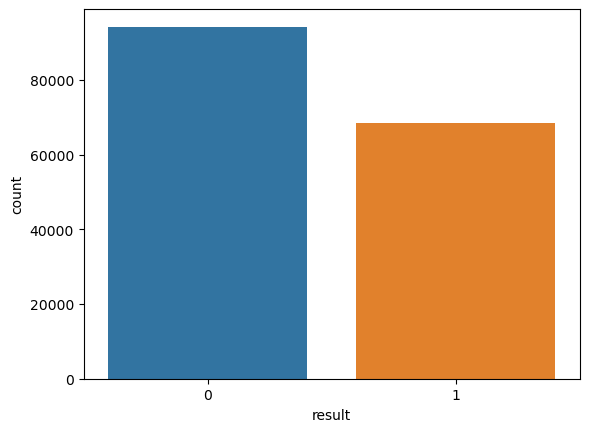

In [48]:
sns.countplot(x=deliv_df['result'])

In [49]:
deliv_df['result'].value_counts()

0    94194
1    68548
Name: result, dtype: int64

In [50]:
# deliv_df[['total_runs_x','total_runs_y']]
deliv_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs_x', 'player_dismissed',
       'dismissal_kind', 'fielder', 'city', 'winner', 'total_runs_y',
       'curr_score', 'runs_left', 'balls_left', 'wickets', 'curr_rr', 'req_rr',
       'result'],
      dtype='object')

## NOW taking the only required fields

In [51]:
df=deliv_df[['batting_team','bowling_team','city',
             'runs_left','balls_left','wickets',
             'total_runs_y','curr_rr','req_rr','result']]

In [52]:
df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_y,curr_rr,req_rr,result
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,208,119.0,10,208,0.0,10.487395,1
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,208,118.0,10,208,0.0,10.576271,1
2,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,204,117.0,10,208,8.0,10.461538,1
3,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,204,116.0,10,208,6.0,10.551724,1
4,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,202,115.0,10,208,7.2,10.539130,1


## Now splitting of train,test data and handling categorical fields

In [53]:
df.isna().sum()

batting_team       0
bowling_team       0
city            1700
runs_left          0
balls_left         0
wickets            0
total_runs_y       0
curr_rr            0
req_rr             2
result             0
dtype: int64

In [54]:
df.shape

(162742, 10)

##  Out of 162742 1700 cities are missing.... which can be ignored and hence dropped

In [55]:
df.dropna(inplace=True)

In [56]:
df.isna().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets         0
total_runs_y    0
curr_rr         0
req_rr          0
result          0
dtype: int64

In [57]:
df=df[df['balls_left']!=0]

In [58]:
df2=df.copy()
x=df.drop('result',axis=1)
y=df['result']

In [59]:
x.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_y,curr_rr,req_rr
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,208,119.0,10,208,0.0,10.487395
1,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,208,118.0,10,208,0.0,10.576271
2,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,204,117.0,10,208,8.0,10.461538
3,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,204,116.0,10,208,6.0,10.551724
4,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,202,115.0,10,208,7.2,10.539130


In [60]:
from sklearn.model_selection import train_test_split as tts

In [61]:
xtr,xts,ytr,yts=tts(x,y,train_size=0.65,random_state=0)

In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [63]:
from sklearn.pipeline import Pipeline

In [64]:
cf=ColumnTransformer([('trf',OneHotEncoder(),['batting_team','bowling_team','city'])],remainder='passthrough')

In [65]:
a=pd.DataFrame()
j=cf.fit_transform(xtr)

# Pipeline creation

In [66]:
pipe=Pipeline(steps=[
    ('step1',cf),
    ('step2',LogisticRegression(solver='liblinear'))
])

pipe.fit(xtr,ytr)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf', OneHotEncoder(),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [67]:
pipe.score(xts,yts)

0.7325004461895414

In [68]:
pipe.predict_proba(xts)[1]

array([0.48826558, 0.51173442])

In [73]:
# pipe2=Pipeline(steps=[
#     ('step1',cf),
#     ('step2',RandomForestClassifier())
# ])

# pipe2.fit(xtr,ytr)

In [74]:
# pipe2.score(xts,yts)

In [75]:
# pipe2.score(xtr,ytr)

In [76]:
# pipe2.predict_proba(xts)[2]

# As we can see that RandomForestClassifier is biased...................... we do not consider it

In [77]:
import pickle 
# pickle.dump(pipe,open('pipe2.pkl','wb'))

In [78]:
df.city.unique()

array(['Hyderabad', 'Pune', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata',
       'Delhi', 'Rajkot', 'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town',
       'Port Elizabeth', 'Durban', 'Centurion', 'East London',
       'Johannesburg', 'Kimberley', 'Bloemfontein', 'Ahmedabad',
       'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi', 'Visakhapatnam',
       'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', 'Kanpur', 'Mohali',
       'Bengaluru'], dtype=object)

In [79]:
x.columns

Index(['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets', 'total_runs_y', 'curr_rr', 'req_rr'],
      dtype='object')

In [80]:
xtr

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_y,curr_rr,req_rr
36520,Rajasthan Royals,Mumbai Indians,Mumbai,211,40.0,9,213,0.150000,31.650000
87892,Mumbai Indians,Royal Challengers Bangalore,Mumbai,179,23.0,10,195,0.989691,46.695652
70274,Kings XI Punjab,Mumbai Indians,Chandigarh,17,102.0,7,169,50.666667,1.000000
5519,Sunrisers Hyderabad,Kings XI Punjab,Chandigarh,93,112.0,9,208,86.250000,4.982143
85600,Kolkata Knight Riders,Chennai Super Kings,Kolkata,2,38.0,1,120,8.634146,0.315789
...,...,...,...,...,...,...,...,...,...
98699,Sunrisers Hyderabad,Kings XI Punjab,Sharjah,150,97.0,7,194,11.478261,9.278351
96510,Chennai Super Kings,Mumbai Indians,Kolkata,147,111.0,10,149,1.333333,7.945946
154925,Rajasthan Royals,Mumbai Indians,Mumbai,79,106.0,9,192,48.428571,4.471698
120351,Chennai Super Kings,Mumbai Indians,Chennai,36,29.0,6,159,8.109890,7.448276


In [75]:
# conda install -c conda-forge opencv
